In [202]:
%pylab inline

from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.collections import PatchCollection

from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

import numba as nb
import time

Populating the interactive namespace from numpy and matplotlib


In [203]:
G = 6.67e-8

dt = 1e0
stepN = 1000
h = 2e9

In [204]:
### --- Distribution Case 1 --- ###
xyDistribution = np.array(([1.0e8, 1.0e8], 
                           [-1.0e8, -1.0e8])) 
nParticles = len(xyDistribution)

### --- Distribution Case 1.5 --- ###
# xyDistribution = np.array(([1.0e8, 1.0e8], 
#                            [-1.0e8, -5.0e8],
#                            [0.0, 1.0e8]))
# nParticles = len(xyDistribution)

### --- Distribution Case 2 --- ###
# nParticles = 250
# xyDistribution = np.random.normal(0,5e7, size=(nParticles, 2))

# Velocity and mass distribution
velocityDistribution = np.zeros_like(xyDistribution, dtype = np.float)

mDistribution = np.ones(nParticles, dtype=float) * 2e27

# Pressure and density based off of what we're seeing in Jupiter
pressureDistribution = np.ones(nParticles, dtype=float) * 4e13
rhoDistribution = np.ones(nParticles, dtype=float) * 3

ParticlePositionHistory = np.zeros((nParticles,2,stepN))
ParticleVelocityHistory = np.zeros((nParticles,2,stepN))


timeArray = np.arange(0, stepN*dt, dt)

[]

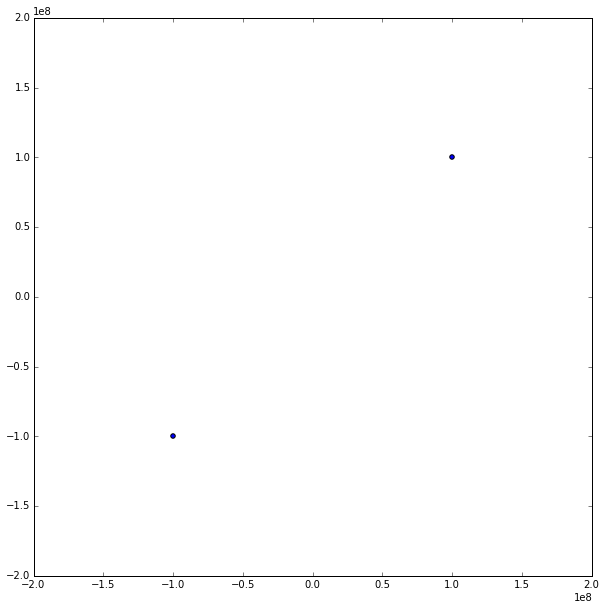

In [205]:
plt.figure(figsize=(10,10))
plt.scatter(xyDistribution[:,0], xyDistribution[:,1], c='b')
plt.xlim(-2e8, 2e8)
plt.ylim(-2e8, 2e8)
plt.plot()

In [206]:
def gravity():
    
    global velocityDistribution
    global xyDistribution
    global h
    
    deltaV = np.zeros_like(xyDistribution, dtype = np.float)
    for j in range(0, nParticles):
        for k in range(0, nParticles):
            if (k!=j):
                xdist = (xyDistribution[j,0]-xyDistribution[k,0])
                ydist = (xyDistribution[j,1]-xyDistribution[k,1])
                #print(xdist)
                #print(ydist)

                if(xdist<h/1e9):
                    deltaV[j,0] += -G*mDistribution[j]*xdist/((np.sqrt(xdist**2+ydist**2))**3)
                else:
                    deltaV[j,0] += -G*mDistribution[j]*xdist/((np.sqrt(xdist**2+ydist**2))**3)
                    #print("blah", -G*mDistribution[i]/(np.sqrt(abs(position[j,0]-position[i,0]))**2))
                    #print("v", i, "x", velocityDistribution[i,0])

                if(ydist<h/1e9):
                    deltaV[j,1] += -G*mDistribution[j]*ydist/((np.sqrt(xdist**2+ydist**2))**3)
                else:
                    deltaV[j,1] += -G*mDistribution[j]*ydist/((np.sqrt(xdist**2+ydist**2))**3)
                    #print("v", i, "y", velocityDistribution[i,1])
    return deltaV

nb_gravity = nb.autojit(gravity)

In [207]:
# RK1 Parameters
t0 = time.time()
t = 0
#dt = 1e1
#stepN = 20

# Particle history
ParticlePositionHistory = np.zeros((stepN,nParticles,2))
ParticleRhoHistory = np.zeros((stepN, nParticles, 1))
xyDistributionOld = np.copy(xyDistribution)

# Force history
forceHistory = np.zeros((stepN, 3))
for i in range(stepN):
    if i % 1 == 0:
        print "Time step", i
    if i == 2:
        rhoOld = np.copy(rhoDistribution)
    deltaVf = np.zeros_like(xyDistribution, dtype = np.float)
    
    t += 1
    ParticlePositionHistory[i,:,:] = xyDistribution
    
    deltaVf += nb_gravity() 
#    print "\nAvg gravity", np.mean(deltaVf)
    forceHistory[i,0] = np.median(deltaVf)
    
#     deltaVf -= -gradP()/rhoDistribution[:,np.newaxis]
# #    print "Avg gravity + pressure", np.mean(deltaVf)
#     forceHistory[i,1] = np.mean(deltaVf)

#    deltaVf +=  -v*velocityDistribution**1
#    print "Avg damping:", np.mean(velocityDistribution)    
#    forceHistory[i,2] = np.mean(-v*velocityDistribution**1)

    
    velocityDistribution += dt*deltaVf    
    xyDistribution += dt*velocityDistribution
    
#    densityUpdate()
#    ParticleRhoHistory[i,:,:] = rhoDistribution[:,np.newaxis]
#    pressureDistribution = K*rhoDistribution**2

print(time.time()-t0)
#print(rhoDistribution-rhoOld)
#print(xyDistribution-xyDistributionOld) 


Time step 0
Time step 1
Time step 2
Time step 3
Time step 4
Time step 5
Time step 6
Time step 7
Time step 8
Time step 9
Time step 10
Time step 11
Time step 12
Time step 13
Time step 14
Time step 15
Time step 16
Time step 17
Time step 18
Time step 19
Time step 20
Time step 21
Time step 22
Time step 23
Time step 24
Time step 25
Time step 26
Time step 27
Time step 28
Time step 29
Time step 30
Time step 31
Time step 32
Time step 33
Time step 34
Time step 35
Time step 36
Time step 37
Time step 38
Time step 39
Time step 40
Time step 41
Time step 42
Time step 43
Time step 44
Time step 45
Time step 46
Time step 47
Time step 48
Time step 49
Time step 50
Time step 51
Time step 52
Time step 53
Time step 54
Time step 55
Time step 56
Time step 57
Time step 58
Time step 59
Time step 60
Time step 61
Time step 62
Time step 63
Time step 64
Time step 65
Time step 66
Time step 67
Time step 68
Time step 69
Time step 70
Time step 71
Time step 72
Time step 73
Time step 74
Time step 75
Time step 76
Time step

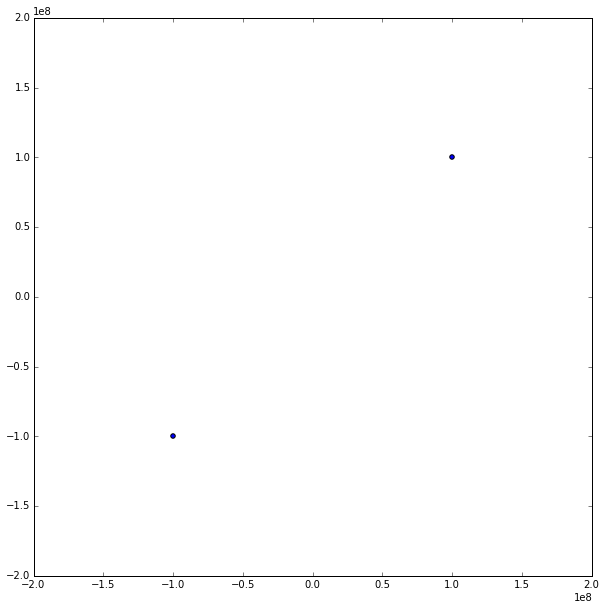

In [208]:
slider = FloatSlider(description='Time', min=1, max=stepN, step=1)

def update_plot():
    time=slider.value
    x = ParticlePositionHistory[time-1,:,0]
    y = ParticlePositionHistory[time-1,:,1]
    fig = plt.figure(figsize=(10,10))
    plt.scatter(x, y)
    plt.xlim(-2e8,2e8)
    plt.ylim(-2e8,2e8)

    clear_output(True)

slider.on_trait_change(update_plot, 'value')


display(slider)
update_plot()

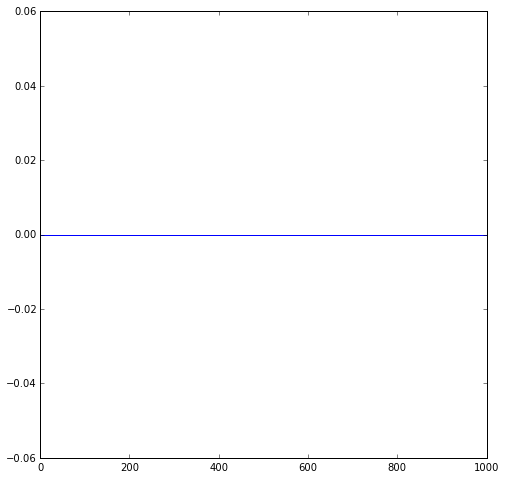

In [209]:
plt.figure(figsize=(8,8))
plt.plot(range(stepN), forceHistory[:,0], label='gravity')
